In [1]:
import feature_engine.encoding
import feature_engine.imputation
import feature_engine.pipeline
import feature_engine.selection
import feature_engine.wrappers
import pandas
import pycaret.classification as classification
import sklearn.preprocessing

In [2]:
train_df = pandas.read_csv("train.csv")
train_df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [3]:
train_wo_na_df = train_df.dropna()
train_wo_na_df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1228,yes,adult,534963,38.3,48.0,20.0,normal,normal,bright_pink,...,41.0,65.0,clear,2.0,yes,3111,0,0,no,lived
1229,1229,yes,adult,535338,38.0,136.0,20.0,cool,reduced,bright_red,...,66.0,65.0,serosanguious,2.0,yes,2208,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived


In [4]:
X_train = train_wo_na_df.drop(columns=["outcome"])
X_train

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,...,firm,49.0,8.0,cloudy,2.8,no,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1228,yes,adult,534963,38.3,48.0,20.0,normal,normal,bright_pink,...,distend_small,41.0,65.0,clear,2.0,yes,3111,0,0,no
1229,1229,yes,adult,535338,38.0,136.0,20.0,cool,reduced,bright_red,...,distend_small,66.0,65.0,serosanguious,2.0,yes,2208,0,0,no
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,distend_small,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,firm,40.0,5.9,cloudy,7.0,yes,400,0,0,yes


In [5]:
y_train = train_wo_na_df[["outcome"]]
y_train

,outcome
0,died
1,euthanized
3,lived
4,lived
5,lived
...,...
1228,lived
1229,lived
1231,died
1232,lived


In [6]:
columns = list(X_train.columns)
columns

['id',
 'surgery',
 'age',
 'hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'nasogastric_reflux_ph',
 'rectal_exam_feces',
 'abdomen',
 'packed_cell_volume',
 'total_protein',
 'abdomo_appearance',
 'abdomo_protein',
 'surgical_lesion',
 'lesion_1',
 'lesion_2',
 'lesion_3',
 'cp_data']

In [7]:
X_train.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [8]:
numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns
numerical_columns = list(numerical_columns)
numerical_columns.remove("id")
numerical_columns

['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [9]:
categorical_columns = X_train.select_dtypes(include=["object"]).columns
categorical_columns = list(categorical_columns)
categorical_columns

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data']

In [10]:
X_pipeline = feature_engine.pipeline.make_pipeline(
    feature_engine.selection.DropFeatures(features_to_drop=["id"]),
    feature_engine.encoding.OrdinalEncoder(encoding_method="arbitrary", variables=categorical_columns, missing_values="ignore"),
    feature_engine.wrappers.SklearnTransformerWrapper(transformer=sklearn.preprocessing.MinMaxScaler(), variables=numerical_columns),
)  

In [11]:
X_train_transformed = X_pipeline.fit_transform(X_train)
X_train_transformed

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,0.001424,0.500000,0.662338,0.181818,0,0,0,0,...,0,0.653846,0.058480,0,0.263736,0,0.071006,0.0,0.0,0
1,0,0,0.002226,0.388889,0.376623,0.045455,0,1,1,0,...,0,0.192308,0.707602,0,0.109890,0,0.070974,0.0,0.0,0
3,0,0,0.991094,0.314815,0.272727,0.250000,1,0,2,0,...,0,0.576923,0.040936,1,0.318681,0,0.070974,0.0,0.0,1
4,1,0,0.998850,0.481481,0.142857,0.454545,2,1,3,1,...,1,0.461538,0.044444,1,0.175824,1,0.000000,0.0,0.0,1
5,1,0,0.001349,0.500000,0.168831,0.272727,2,1,4,1,...,2,0.500000,0.052632,1,0.197802,1,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,0,0,0.002462,0.537037,0.116883,0.136364,2,1,4,0,...,0,0.346154,0.719298,2,0.109890,0,0.100000,0.0,0.0,0
1229,0,0,0.002540,0.481481,0.688312,0.136364,0,0,5,1,...,0,0.826923,0.719298,0,0.109890,0,0.070974,0.0,0.0,0
1231,0,0,0.001125,0.388889,0.194805,0.477273,0,0,1,1,...,0,0.230769,0.033918,0,0.285714,0,0.071006,0.0,0.0,1
1232,0,1,0.001358,0.388889,0.350649,0.363636,2,0,3,1,...,2,0.326923,0.028070,1,0.659341,0,0.012858,0.0,0.0,1


In [12]:
y_encoder = feature_engine.encoding.OrdinalEncoder(encoding_method="arbitrary")

In [13]:
y_train_encoded = y_encoder.fit_transform(y_train)
y_train_encoded

,outcome
0,0
1,1
3,2
4,2
5,2
...,...
1228,2
1229,2
1231,0
1232,2


In [14]:
Xy_train = X_train_transformed.copy()
Xy_train = Xy_train.join(y_train_encoded)
Xy_train

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,0,0.001424,0.500000,0.662338,0.181818,0,0,0,0,...,0.653846,0.058480,0,0.263736,0,0.071006,0.0,0.0,0,0
1,0,0,0.002226,0.388889,0.376623,0.045455,0,1,1,0,...,0.192308,0.707602,0,0.109890,0,0.070974,0.0,0.0,0,1
3,0,0,0.991094,0.314815,0.272727,0.250000,1,0,2,0,...,0.576923,0.040936,1,0.318681,0,0.070974,0.0,0.0,1,2
4,1,0,0.998850,0.481481,0.142857,0.454545,2,1,3,1,...,0.461538,0.044444,1,0.175824,1,0.000000,0.0,0.0,1,2
5,1,0,0.001349,0.500000,0.168831,0.272727,2,1,4,1,...,0.500000,0.052632,1,0.197802,1,0.000000,0.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,0,0,0.002462,0.537037,0.116883,0.136364,2,1,4,0,...,0.346154,0.719298,2,0.109890,0,0.100000,0.0,0.0,0,2
1229,0,0,0.002540,0.481481,0.688312,0.136364,0,0,5,1,...,0.826923,0.719298,0,0.109890,0,0.070974,0.0,0.0,0,2
1231,0,0,0.001125,0.388889,0.194805,0.477273,0,0,1,1,...,0.230769,0.033918,0,0.285714,0,0.071006,0.0,0.0,1,0
1232,0,1,0.001358,0.388889,0.350649,0.363636,2,0,3,1,...,0.326923,0.028070,1,0.659341,0,0.012858,0.0,0.0,1,2


In [15]:
classification.setup(Xy_train, target="outcome")

,Description,Value
0,Session id,1791
1,Target,outcome
2,Target type,Multiclass
3,Original data shape,"(771, 28)"
4,Transformed data shape,"(771, 28)"
5,Transformed train set shape,"(539, 28)"
6,Transformed test set shape,"(232, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [16]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7235,0.0000,0.7235,0.7317,0.7155,0.5292,0.5358,0.0640
lightgbm,Light Gradient Boosting Machine,0.7218,0.8400,0.7218,0.7338,0.7135,0.5263,0.5310,0.1290
et,Extra Trees Classifier,0.7217,0.8345,0.7217,0.7259,0.7126,0.5243,0.5300,0.0370
rf,Random Forest Classifier,0.7216,0.8358,0.7216,0.7284,0.7119,0.5226,0.5276,0.0370
ridge,Ridge Classifier,0.6846,0.0000,0.6846,0.6789,0.6678,0.4514,0.4604,0.0060
lda,Linear Discriminant Analysis,0.6772,0.0000,0.6772,0.6794,0.6695,0.4502,0.4555,0.0060
lr,Logistic Regression,0.6735,0.0000,0.6735,0.6716,0.6611,0.4376,0.4450,0.4670
ada,Ada Boost Classifier,0.6642,0.0000,0.6642,0.6714,0.6610,0.4352,0.4381,0.0180
knn,K Neighbors Classifier,0.6253,0.7566,0.6253,0.6230,0.6103,0.3629,0.3708,0.2930
svm,SVM - Linear Kernel,0.6123,0.0000,0.6123,0.6247,0.5897,0.3301,0.3474,0.0120


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1791, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
model = classification.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.7784,0.6852,0.7122,0.6826,0.4532,0.4572
1,0.8704,0.9372,0.8704,0.8778,0.8711,0.7851,0.7892
2,0.7778,0.8715,0.7778,0.7958,0.7767,0.6202,0.6251
3,0.7778,0.8839,0.7778,0.7769,0.7767,0.6243,0.6247
4,0.7222,0.8393,0.7222,0.7145,0.7138,0.5271,0.5296
5,0.6481,0.8146,0.6481,0.6982,0.6192,0.3853,0.3958
6,0.6852,0.7838,0.6852,0.6526,0.6601,0.4571,0.4630
7,0.7037,0.8692,0.7037,0.6877,0.6895,0.4885,0.4948
8,0.6852,0.7539,0.6852,0.7227,0.6783,0.4669,0.4761


In [18]:
tuned_model = classification.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.7551,0.6852,0.7172,0.6832,0.4578,0.4639
1,0.7963,0.9054,0.7963,0.8108,0.7945,0.6504,0.6541
2,0.7778,0.8859,0.7778,0.7989,0.7605,0.6061,0.6154
3,0.7593,0.9084,0.7593,0.7426,0.7460,0.5816,0.5853
4,0.7222,0.8465,0.7222,0.7145,0.7138,0.5271,0.5296
5,0.6481,0.7982,0.6481,0.6948,0.6181,0.3793,0.3896
6,0.6852,0.7853,0.6852,0.6538,0.6650,0.4632,0.4670
7,0.7222,0.8650,0.7222,0.7084,0.7091,0.5204,0.5271
8,0.6481,0.7674,0.6481,0.6971,0.6187,0.3893,0.3999


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


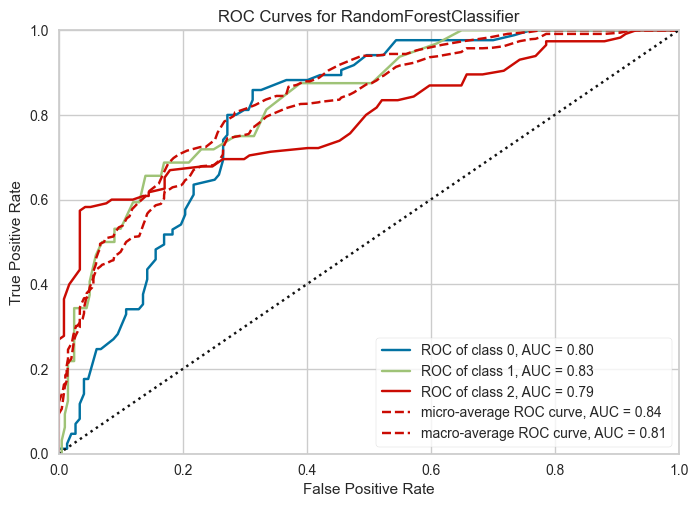

In [19]:
classification.plot_model(model)

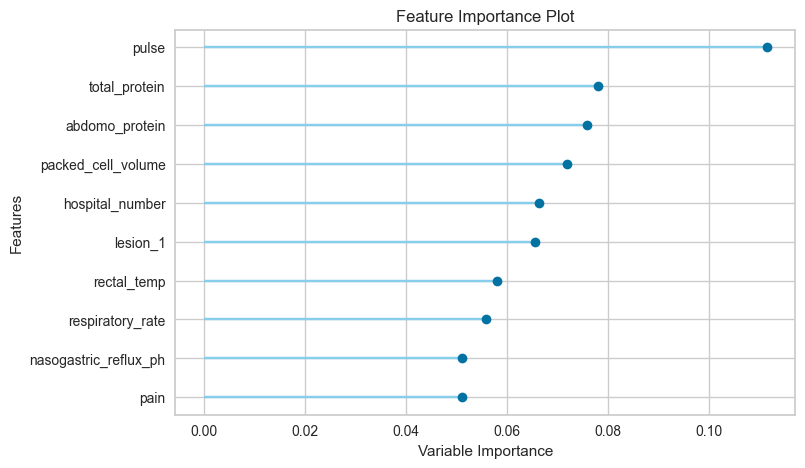

In [20]:
classification.plot_model(model, plot="feature")

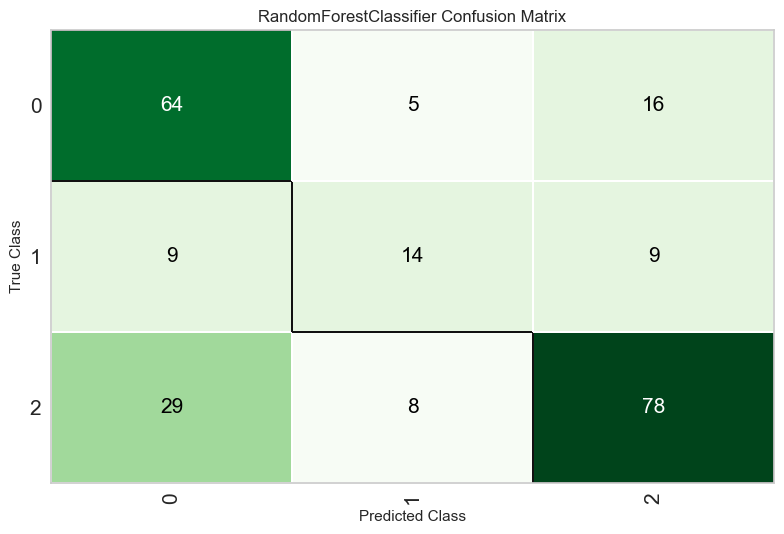

In [21]:
classification.plot_model(model, "confusion_matrix")

In [22]:
final_model = classification.finalize_model(model)

In [23]:
test_df = pandas.read_csv("test.csv")
test_df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,...,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,...,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,...,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,...,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [25]:
tmp_df = test_df.copy()
test_transformed_df = X_pipeline.transform(tmp_df)
test_transformed_df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,0,0.002272,0.592593,0.064935,0.136364,2.0,1.0,3.0,1.0,...,0.0,0.365385,0.046784,2.0,0.142857,1,0.000000,0.0,0.0,0
1,0,0,0.001104,0.518519,0.532468,0.454545,0.0,0.0,4.0,0.0,...,0.0,0.403846,0.029240,0.0,0.175824,1,0.070974,0.0,0.0,1
2,0,0,0.001043,0.425926,0.233766,0.045455,0.0,1.0,5.0,1.0,...,0.0,0.163462,0.029240,1.0,0.065934,0,0.070878,0.0,0.0,1
3,1,0,0.002425,0.314815,0.376623,0.136364,0.0,0.0,1.0,1.0,...,3.0,1.000000,0.906433,NaN,0.000000,0,0.045002,0.0,0.0,0
4,0,0,0.001391,0.537037,0.129870,0.045455,NaN,1.0,4.0,1.0,...,0.0,0.269231,0.038596,1.0,0.175824,0,0.070974,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,0,0.001311,0.907407,0.545455,0.318182,0.0,0.0,3.0,0.0,...,3.0,0.653846,0.053801,0.0,0.384615,0,0.103022,0.0,0.0,1
820,0,0,0.002540,0.333333,0.454545,0.136364,0.0,0.0,1.0,0.0,...,0.0,0.519231,0.730994,0.0,0.109890,0,0.071006,0.0,0.0,0
821,0,0,0.001349,0.703704,0.662338,0.045455,0.0,0.0,0.0,0.0,...,NaN,0.576923,0.047953,0.0,0.384615,0,0.070878,0.0,0.0,0
822,1,0,0.996246,0.537037,0.155844,0.659091,2.0,1.0,3.0,1.0,...,NaN,0.500000,0.059649,2.0,0.439560,1,0.100000,0.0,0.0,1


In [26]:
predicted_df = classification.predict_model(final_model, test_transformed_df)
predicted_df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,prediction_label,prediction_score
0,1,0,0.002272,0.592593,0.064935,0.136364,2.0,1.0,3.0,1.0,...,0.046784,2.0,0.142857,1,0.000000,0.0,0.0,0,2,0.91
1,0,0,0.001104,0.518519,0.532468,0.454545,0.0,0.0,4.0,0.0,...,0.029240,0.0,0.175824,1,0.070974,0.0,0.0,1,0,0.59
2,0,0,0.001043,0.425926,0.233766,0.045455,0.0,1.0,5.0,1.0,...,0.029240,1.0,0.065934,0,0.070878,0.0,0.0,1,2,0.84
3,1,0,0.002425,0.314815,0.376623,0.136364,0.0,0.0,1.0,1.0,...,0.906433,NaN,0.000000,0,0.045002,0.0,0.0,0,1,0.71
4,0,0,0.001391,0.537037,0.129870,0.045455,NaN,1.0,4.0,1.0,...,0.038596,1.0,0.175824,0,0.070974,0.0,0.0,1,2,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,0,0.001311,0.907407,0.545455,0.318182,0.0,0.0,3.0,0.0,...,0.053801,0.0,0.384615,0,0.103022,0.0,0.0,1,0,0.69
820,0,0,0.002540,0.333333,0.454545,0.136364,0.0,0.0,1.0,0.0,...,0.730994,0.0,0.109890,0,0.071006,0.0,0.0,0,1,0.73
821,0,0,0.001349,0.703704,0.662338,0.045455,0.0,0.0,0.0,0.0,...,0.047953,0.0,0.384615,0,0.070878,0.0,0.0,0,0,0.69
822,1,0,0.996246,0.537037,0.155844,0.659091,2.0,1.0,3.0,1.0,...,0.059649,2.0,0.439560,1,0.100000,0.0,0.0,1,2,0.91


In [30]:
tmp_df = predicted_df[["prediction_label"]].copy()
tmp_df.columns = ["outcome"]
y_predicted = y_encoder.inverse_transform(tmp_df)
y_predicted

,outcome
0,lived
1,died
2,lived
3,euthanized
4,lived
...,...
819,died
820,euthanized
821,died
822,lived


In [31]:
submit_df = test_df[["id"]].copy()
submit_df = submit_df.join(y_predicted)
submit_df

,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
3,1238,euthanized
4,1239,lived
...,...,...
819,2054,died
820,2055,euthanized
821,2056,died
822,2057,lived


In [32]:
submit_df.to_csv("submit.csv", index=False)